In [1]:
print("BigMart analysis notebook is active")


BigMart analysis notebook is active


In [1]:
import pandas as pd

# Load dataset
data_path = "../data/raw/train.csv"
df = pd.read_csv(data_path)

# Basic sanity check
df.head(), df.shape


(  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
 0           FDA15         9.30          Low Fat         0.016047   
 1           DRC01         5.92          Regular         0.019278   
 2           FDN15        17.50          Low Fat         0.016760   
 3           FDX07        19.20          Regular         0.000000   
 4           NCD19         8.93          Low Fat         0.000000   
 
                Item_Type  Item_MRP Outlet_Identifier  \
 0                  Dairy  249.8092            OUT049   
 1            Soft Drinks   48.2692            OUT018   
 2                   Meat  141.6180            OUT049   
 3  Fruits and Vegetables  182.0950            OUT010   
 4              Household   53.8614            OUT013   
 
    Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
 0                       1999      Medium               Tier 1   
 1                       2009      Medium               Tier 3   
 2                       1999      Medium 

In [3]:
df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
df.select_dtypes(include='object').nunique()


Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [6]:
df['Item_Outlet_Sales'].describe()


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

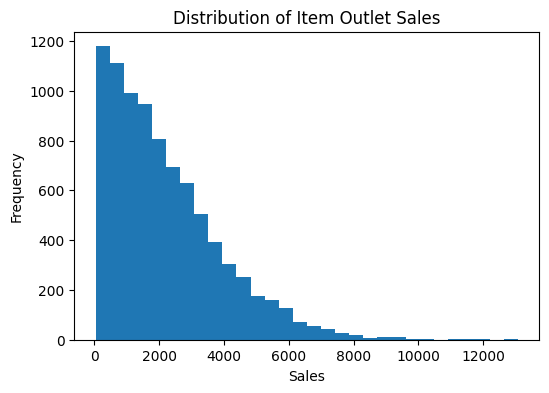

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.hist(df['Item_Outlet_Sales'], bins=30)
plt.title("Distribution of Item Outlet Sales")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


In [8]:
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
df['Item_Type'].value_counts().head(10)


Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Name: count, dtype: int64

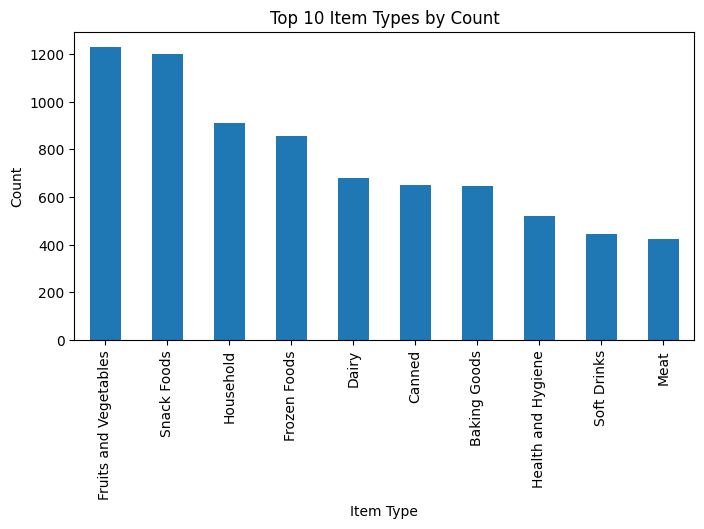

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['Item_Type'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Item Types by Count")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.show()


In [11]:
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean()


Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

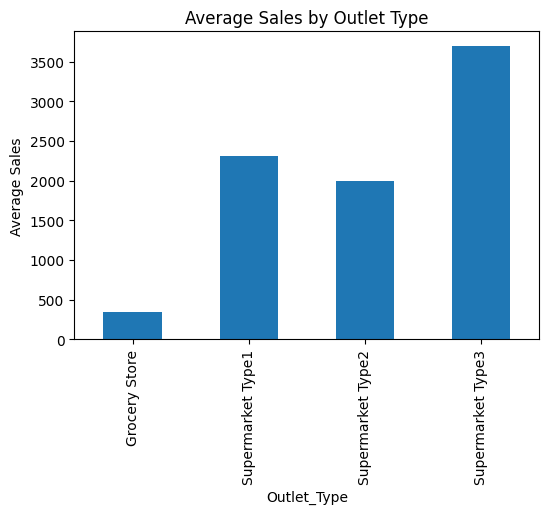

In [12]:
plt.figure(figsize=(6,4))
df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot(kind='bar')
plt.title("Average Sales by Outlet Type")
plt.ylabel("Average Sales")
plt.show()


In [13]:
# Check missing values
df.isnull().sum()



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [15]:
# Fill missing Item_Weight with median
df['Item_Weight'].fillna(df['Item_Weight'].median(), inplace=True)


In [16]:
# Fill missing Outlet_Size with mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)


In [17]:
df.isnull().sum()


Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [18]:
# Standardize Item_Fat_Content values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

df['Item_Fat_Content'].value_counts()


Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [19]:
# Create Outlet_Age feature
df['Outlet_Age'] = 2025 - df['Outlet_Establishment_Year']

df[['Outlet_Establishment_Year', 'Outlet_Age']].head()


,Outlet_Establishment_Year,Outlet_Age
0,1999,26
1,2009,16
2,1999,26
3,1998,27
4,1987,38


In [20]:
# Drop original year column
df.drop('Outlet_Establishment_Year', axis=1, inplace=True)


In [21]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380,26
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228,16
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700,26
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800,27
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052,38


In [22]:
# Separate target and features
X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

X.shape, y.shape


((8523, 11), (8523,))

In [23]:
# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

X_encoded.head()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,Item_Identifier_DRB25,...,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,26,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,16,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,False
2,17.50,0.016760,141.6180,26,False,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,27,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
4,8.93,0.000000,53.8614,38,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((6818, 1594), (1705, 1594))

In [25]:
from sklearn.linear_model import LinearRegression

# Initialize and train model
lr = LinearRegression()
lr.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Predictions
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

r2, rmse


(0.40291116992463194, np.float64(1273.9189798633386))

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Initialize model
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

# Train model
rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [28]:
# Predictions
y_pred_rf = rf.predict(X_test)

# Metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

r2_rf, rmse_rf


(0.5601117719328776, np.float64(1093.4363431601807))

In [29]:
print("Linear Regression:")
print("R2:", r2)
print("RMSE:", rmse)

print("\nRandom Forest:")
print("R2:", r2_rf)
print("RMSE:", rmse_rf)


Linear Regression:
R2: 0.40291116992463194
RMSE: 1273.9189798633386

Random Forest:
R2: 0.5601117719328776
RMSE: 1093.4363431601807


In [30]:
# Get feature importance
importances = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

# Top 10 features
importances.head(10)


Item_MRP                         0.398443
Outlet_Type_Supermarket Type1    0.095871
Item_Visibility                  0.057495
Outlet_Type_Supermarket Type3    0.053951
Outlet_Identifier_OUT027         0.052280
Outlet_Age                       0.031447
Item_Weight                      0.030656
Outlet_Identifier_OUT018         0.028150
Outlet_Type_Supermarket Type2    0.018026
Item_Fat_Content_Regular         0.004515
dtype: float64

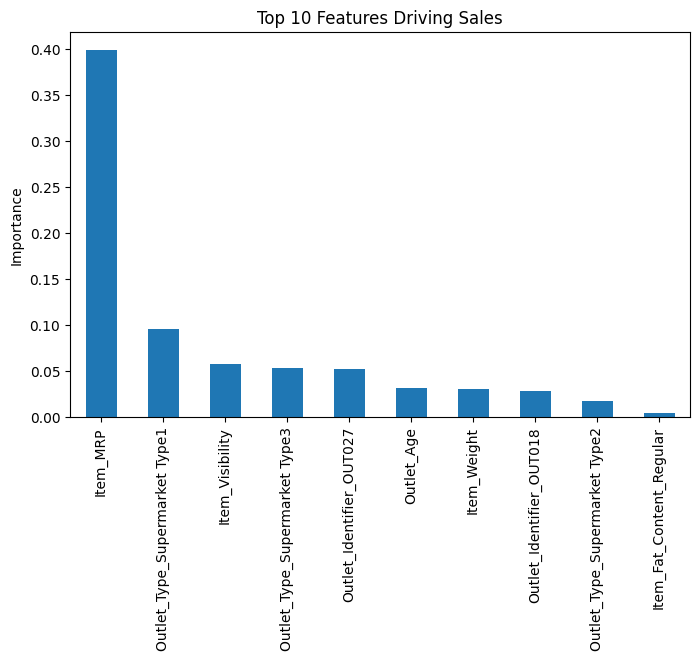

In [31]:
plt.figure(figsize=(8,5))
importances.head(10).plot(kind='bar')
plt.title("Top 10 Features Driving Sales")
plt.ylabel("Importance")
plt.show()
